## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
import warnings


In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
df = pd.read_csv(r'E:\Machine Learning Project\archive (15)\cardio_train.csv', sep = ';')

In [4]:
df_copy = df.copy()

In [5]:
df_copy.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df_copy.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

## Exploratory Data Analysis

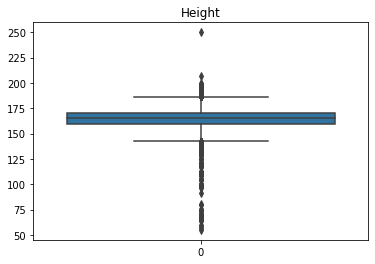

In [8]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams.update({'font.size': 14})
sns.boxplot(df_copy['height'])
plt.title('Height')
plt.show()

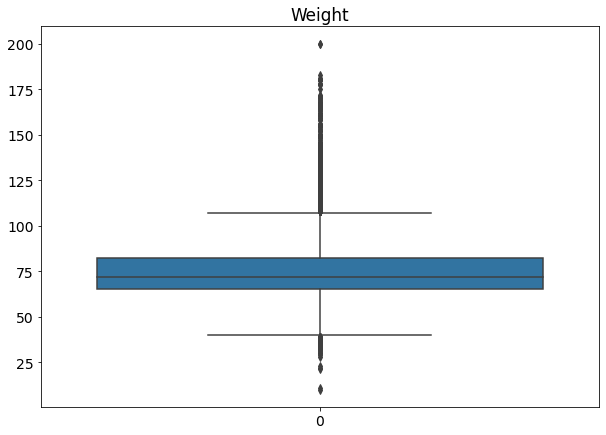

In [9]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams.update({'font.size': 14})
sns.boxplot(df_copy['weight'])
plt.title('Weight')
plt.show()

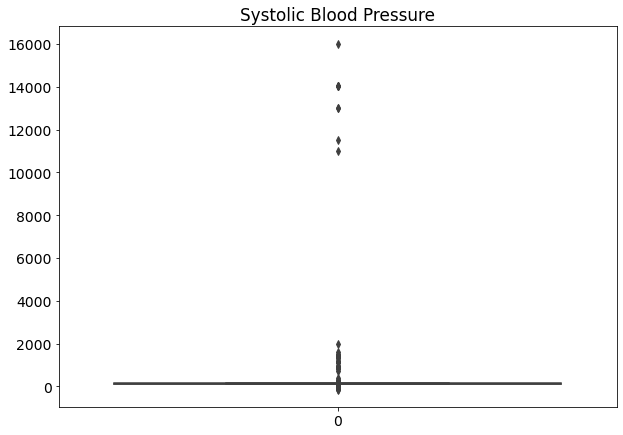

In [10]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams.update({'font.size': 14})
plt.title('Systolic Blood Pressure')
sns.boxplot(df_copy['ap_hi'])
plt.show()


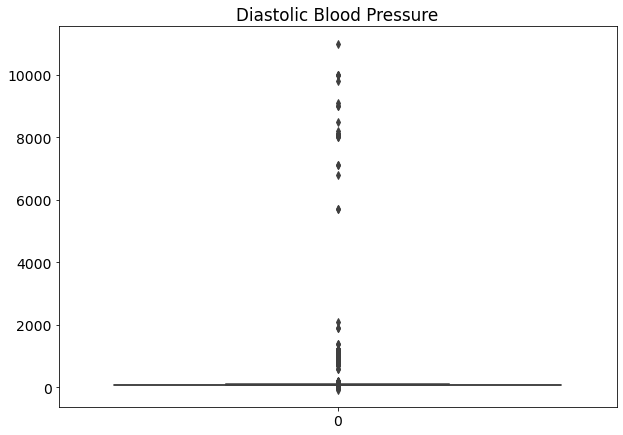

In [11]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams.update({'font.size': 14})
plt.title('Diastolic Blood Pressure')
sns.boxplot(df_copy['ap_lo'])
plt.show()

## Data Preprocessing

In [12]:
def remove_outlier(col_names, df):
    df_copy = df.copy()
    for col in col_names:
        Q1 = np.percentile(df_copy[col], 25,
                   method = 'midpoint')
        Q3 = np.percentile(df_copy[col], 75,
                   method = 'midpoint')
        IQR = Q3 - Q1
        upper = np.where(df_copy[col] >= (Q3+1.5*IQR))
        lower = np.where(df_copy[col] <= (Q1-1.5*IQR))
        df_copy.drop(upper[0], inplace = True)
        df_copy.drop(lower[0], inplace = True)
        df_copy = df_copy.reset_index(drop = True)
    return df_copy
col_names = ['height', 'ap_hi', 'ap_lo']  
df_copy = remove_outlier(col_names, df)

In [13]:
df_copy['age'] = df_copy['age'].div(365).round(2)
bins = [24, 38, 50, 65]
age_bins = pd.cut(df_copy['age'], bins)
df_copy['Age_bins'] = age_bins
df_copy['BMI'] = ((df_copy['weight']/np.square(df_copy['height'])) * 10000).round(2)

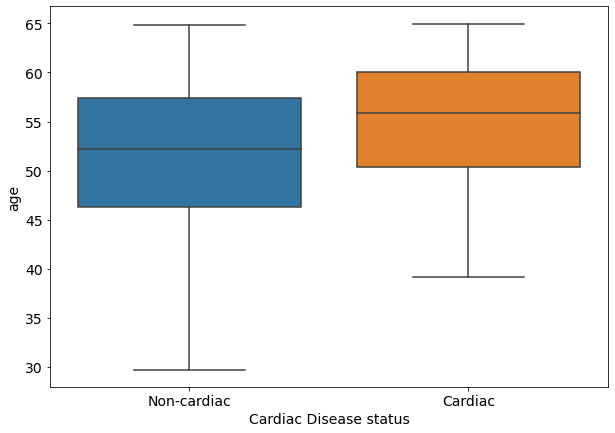

In [14]:
sns.boxplot(x = df_copy['cardio'], y = df_copy['age'] )
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac Disease status')
plt.show()

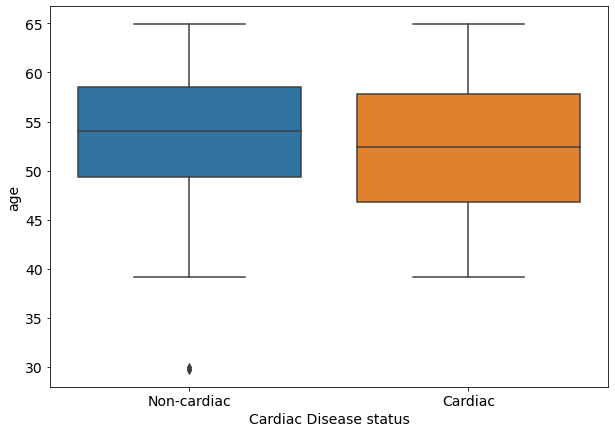

In [15]:
sns.boxplot(x = df_copy['smoke'], y = df_copy['age'] )
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac Disease status')
plt.show()

In [16]:
bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Healthy', "Overweight", 'Obese' ]
df_copy['BMI_binned'] = pd.cut(df_copy['BMI'], bins=bins, labels=labels)

In [17]:
df_copy.dtypes

id                int64
age             float64
gender            int64
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol       int64
gluc              int64
smoke             int64
alco              int64
active            int64
cardio            int64
Age_bins       category
BMI             float64
BMI_binned     category
dtype: object

In [18]:
df_copy.describe()

id           age        gender        height        weight  \
count  63248.000000  63248.000000  63248.000000  63248.000000  63248.000000   
mean   49982.329971     53.395982      1.350730    164.505787     74.162605   
std    28860.943015      6.732678      0.477202      7.578814     13.980957   
min        0.000000     29.750000      1.000000    143.000000     11.000000   
25%    24932.750000     48.540000      1.000000    159.000000     65.000000   
50%    50052.500000     54.010000      1.000000    165.000000     72.000000   
75%    74905.500000     58.460000      2.000000    170.000000     82.000000   
max    99999.000000     64.970000      2.000000    186.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  63248.000000  63248.000000  63248.000000  63248.000000  63248.000000   
mean     126.352644     81.732924      1.362541      1.225130      0.087402   
std       13.758377      7.598081      0.679343      0.572497      0.282425   
min       95.000000     66.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      1.000000      1.000000      0.000000   
max      169.000000    104.000000      3.000000      3.000000      1.000000   

               alco        active        cardio           BMI  
count  63248.000000  63248.000000  63248.000000  63248.000000  
mean       0.052761      0.803852      0.495952     27.439467  
std        0.223557      0.397085      0.499988      5.107056  
min        0.000000      0.000000      0.000000      3.470000  
25%        0.000000      1.000000      0.000000     23.880000  
50%        0.000000      1.000000      0.000000     26.370000  
75%        0.000000      1.000000      1.000000     30.120000  
max        1.000000      1.000000      1.000000     68.310000

In [19]:
df_gen = pd.DataFrame(df_copy.groupby('gender')['cardio'].value_counts(normalize = True))

In [20]:
df_gen.rename(columns = {'cardio': 'count'}, inplace = True)

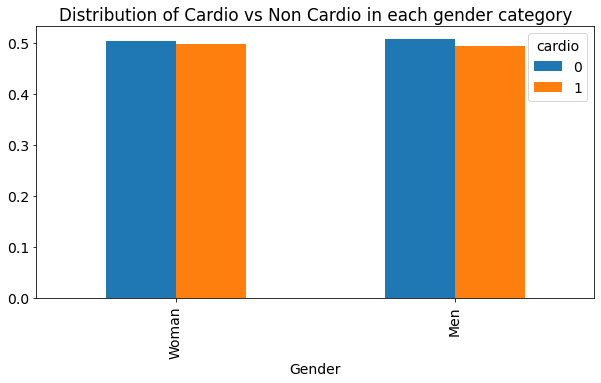

In [21]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 14})
df_gen.stack().unstack(level = 1).plot.bar()
plt.xticks([0,1], ['Woman', 'Men'])
plt.xlabel('Gender')
plt.title('Distribution of Cardio vs Non Cardio in each gender category')
plt.show()

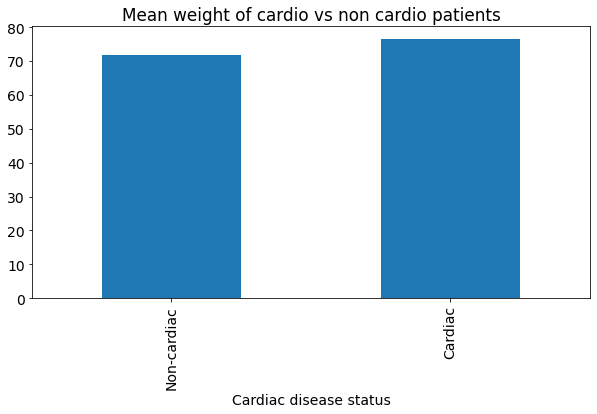

In [22]:
df_copy.groupby('cardio')['weight'].mean().plot.bar()
plt.title('Mean weight of cardio vs non cardio patients')

plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')

plt.show()

In [23]:
df_copy['gender'] = df_copy['gender'].replace({1: 0, 2: 1})

In [24]:
df_chol = pd.DataFrame(df_copy.groupby('cardio')['cholesterol'].value_counts(normalize = True))

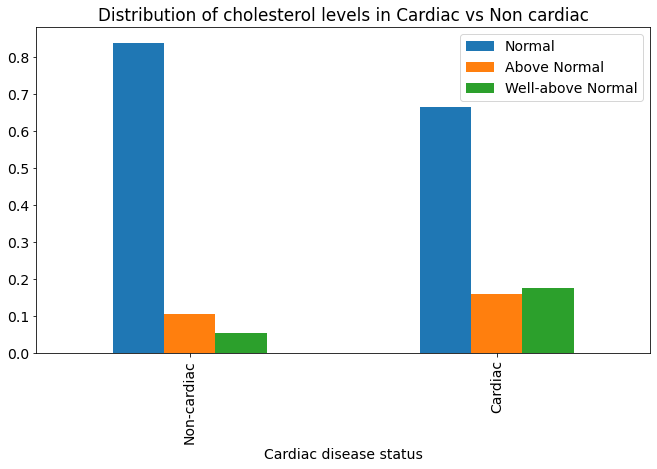

In [25]:
plt.rcParams['figure.figsize'] = [11, 6]
plt.rcParams.update({'font.size': 14})
df_chol.stack().unstack(level=1).plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
legend_labels = ['Normal', 'Above Normal', 'Well-above Normal']
plt.title("Distribution of cholesterol levels in Cardiac vs Non cardiac")
plt.legend(legend_labels, loc = 'upper right')

plt.show()


In [26]:
df_active = pd.DataFrame(df_copy.groupby('cardio')['active'].value_counts(normalize = True))

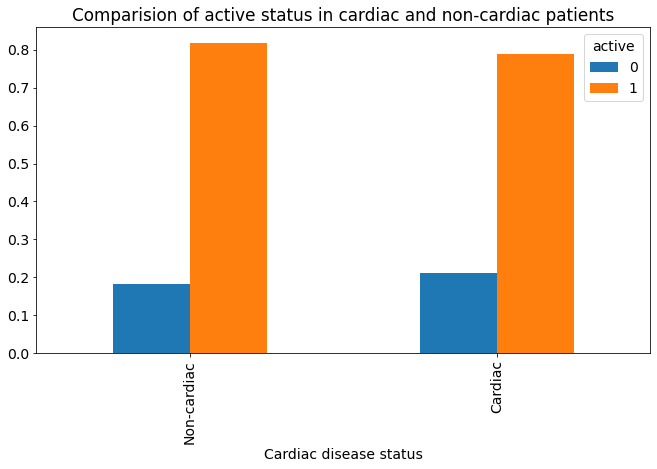

In [27]:
df_active.stack().unstack(level = 1).plot.bar()
plt.title('Comparision of active status in cardiac and non-cardiac patients')
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.show()


In [28]:
df_copy

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  50.39       1     168    62.0    110     80            1     1   
1          1  55.42       0     156    85.0    140     90            3     1   
2          2  51.66       0     165    64.0    130     70            3     1   
3          3  48.28       1     169    82.0    150    100            1     1   
4          8  60.04       0     151    67.0    120     80            2     2   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
63243  99992  57.74       0     165    80.0    150     80            1     1   
63244  99993  52.71       1     168    76.0    120     80            1     1   
63245  99995  61.92       0     158   126.0    140     90            2     2   
63246  99998  61.45       0     163    72.0    135     80            1     2   
63247  99999  56.27       0     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  Age_bins    BMI  BMI_binned  
0          0     0       1       0  (50, 65]  21.97     Healthy  
1          0     0       1       1  (50, 65]  34.93       Obese  
2          0     0       0       1  (50, 65]  23.51     Healthy  
3          0     0       1       1  (38, 50]  28.71  Overweight  
4          0     0       0       0  (50, 65]  29.38  Overweight  
...      ...   ...     ...     ...       ...    ...         ...  
63243      0     0       1       1  (50, 65]  29.38  Overweight  
63244      1     0       1       0  (50, 65]  26.93  Overweight  
63245      0     0       1       1  (50, 65]  50.47       Obese  
63246      0     0       0       1  (50, 65]  27.10  Overweight  
63247      0     0       1       0  (50, 65]  24.91     Healthy  

[63248 rows x 16 columns]

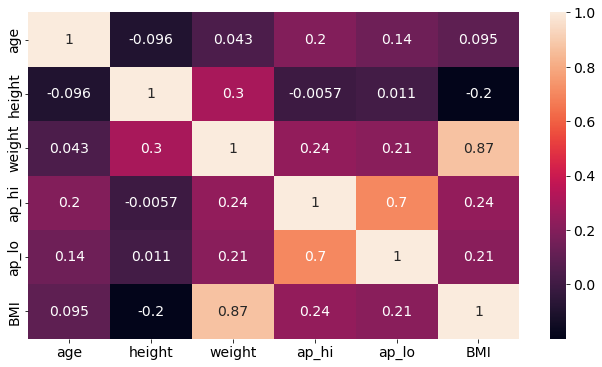

In [29]:
import matplotlib.pyplot as plt

corr = df_copy[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']].corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot = True)
plt.show()

<AxesSubplot:xlabel='cardio', ylabel='BMI'>

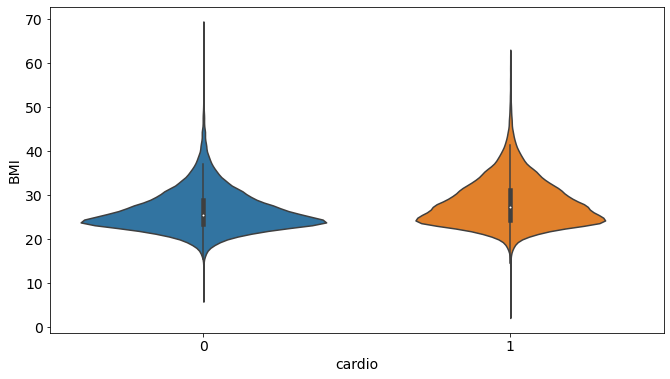

In [30]:
import seaborn as sns
sns.violinplot(x="cardio",y="BMI", data=df_copy)

<AxesSubplot:xlabel='cardio', ylabel='height'>

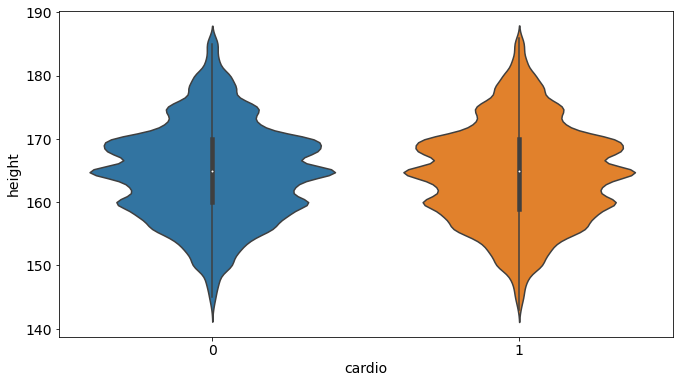

In [31]:
sns.violinplot(x="cardio",y="height", data=df_copy)

<AxesSubplot:xlabel='cardio', ylabel='ap_hi'>

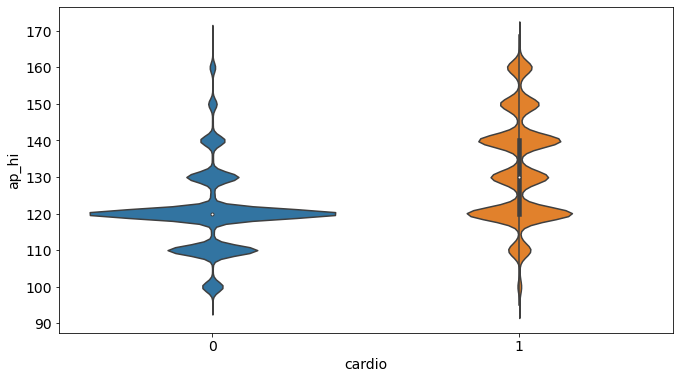

In [32]:
sns.violinplot(x="cardio",y="ap_hi", data=df_copy)

<AxesSubplot:xlabel='cardio', ylabel='ap_lo'>

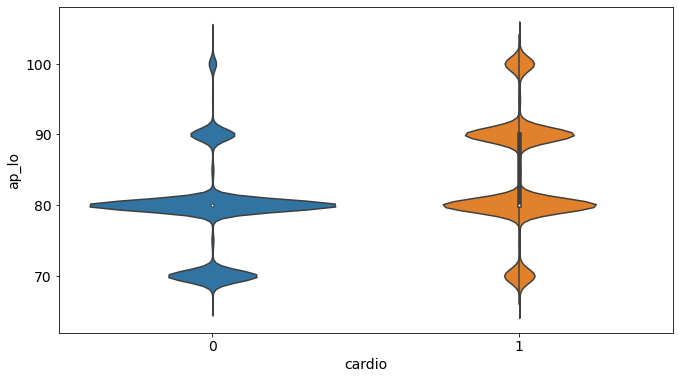

In [33]:
sns.violinplot(x="cardio",y="ap_lo", data=df_copy)

In [34]:
df_copy['height'].min()

143

In [35]:
df_copy.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'Age_bins',
       'BMI', 'BMI_binned'],
      dtype='object')

In [36]:
df_bmi = pd.DataFrame(df_copy.groupby('cardio')['BMI_binned'].value_counts(normalize = True))

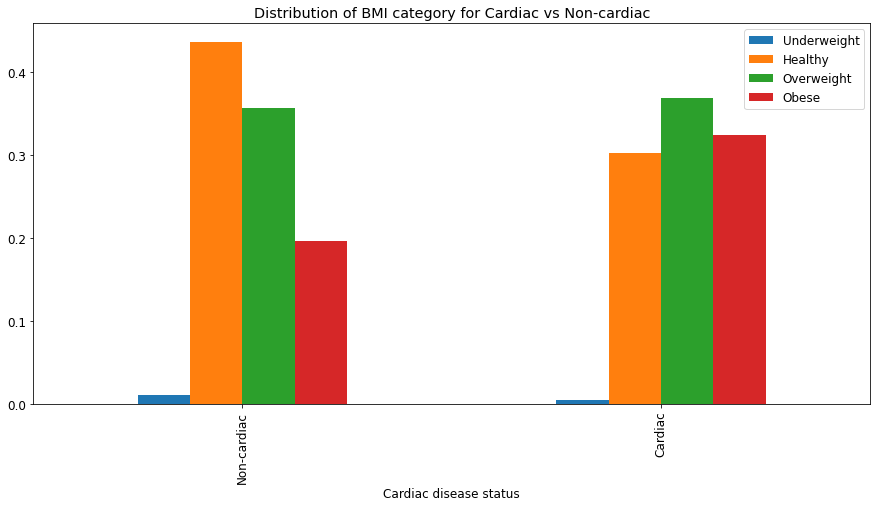

In [37]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams.update({'font.size': 12})
df_bmi.stack().unstack(level = 1).plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.legend(loc = 'upper right')
plt.title('Distribution of BMI category for Cardiac vs Non-cardiac')
plt.show()

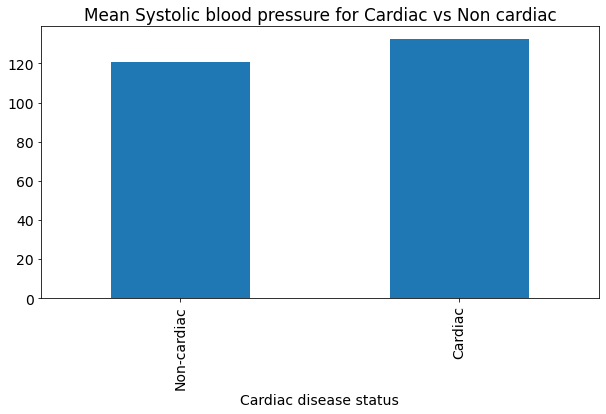

In [38]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 14})
df_copy.groupby('cardio')['ap_hi'].mean().plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.title('Mean Systolic blood pressure for Cardiac vs Non cardiac')
plt.show()

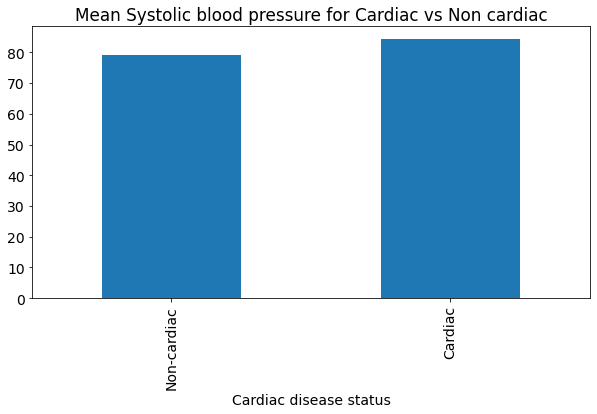

In [39]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 14})
df_copy.groupby('cardio')['ap_lo'].mean().plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.title('Mean Systolic blood pressure for Cardiac vs Non cardiac')
plt.show()

In [40]:
df_copy.loc[((df_copy['ap_hi'] < 120) & (df_copy['ap_lo'] < 80)), 'BP_category'] = 'Normal'
df_copy.loc[((df_copy['ap_hi'].between(120, 129, inclusive = True)) & (df_copy['ap_lo'] < 80)), 'BP_category'] = 'Elevated'
df_copy.loc[((df_copy['ap_hi'].between(130, 139, inclusive = True)) | (df_copy['ap_lo'].between(80, 89, inclusive = True))), 'BP_category'] = 'High Blood Pressure - Stage 1'
df_copy.loc[((df_copy['ap_hi'] >= 140) | (df_copy['ap_lo']>= 90)), 'BP_category'] = 'High Blood Pressure - Stage 2'
df_copy.loc[((df_copy['ap_hi'] >= 180) | (df_copy['ap_lo']>= 120)), 'BP_category'] = 'Hypertensive crisis'


<ipython-input-40-604bbc36fc83>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_copy.loc[((df_copy['ap_hi'].between(120, 129, inclusive = True)) & (df_copy['ap_lo'] < 80)), 'BP_category'] = 'Elevated'
<ipython-input-40-604bbc36fc83>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_copy.loc[((df_copy['ap_hi'].between(130, 139, inclusive = True)) | (df_copy['ap_lo'].between(80, 89, inclusive = True))), 'BP_category'] = 'High Blood Pressure - Stage 1'


In [41]:
df_copy['cardio'].value_counts()

0    31880
1    31368
Name: cardio, dtype: int64

In [42]:
df_bp = pd.DataFrame(df_copy.groupby('cardio')['BP_category'].value_counts())

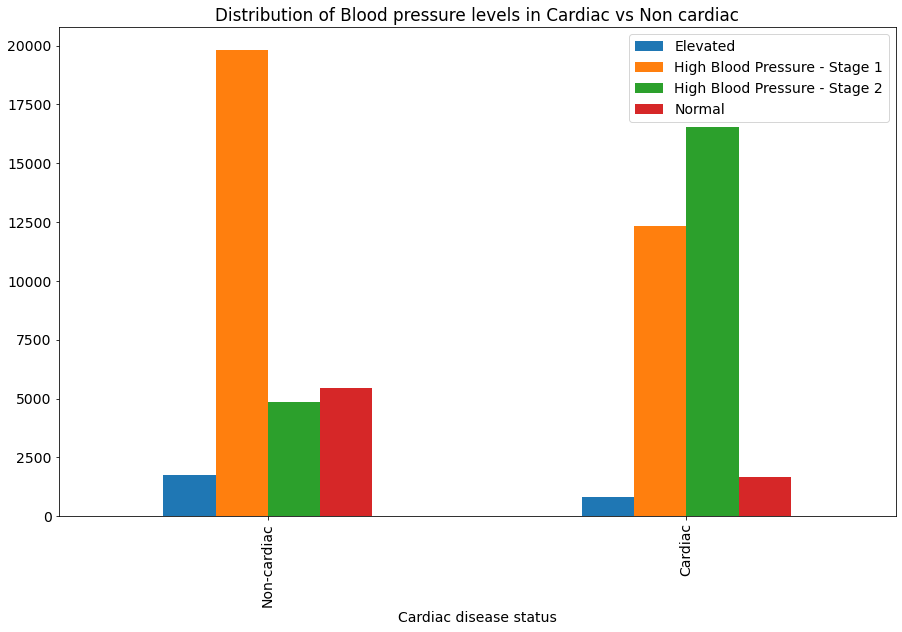

In [43]:
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams.update({'font.size': 14})
df_bp.stack().unstack(level = 1).plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.legend(loc = 'upper right')
plt.title('Distribution of Blood pressure levels in Cardiac vs Non cardiac')
plt.show()

In [44]:
df_copy.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
Age_bins       0
BMI            0
BMI_binned     0
BP_category    0
dtype: int64

In [45]:
df_smoke = pd.DataFrame(df_copy.groupby('cardio')['smoke'].value_counts(normalize = True))

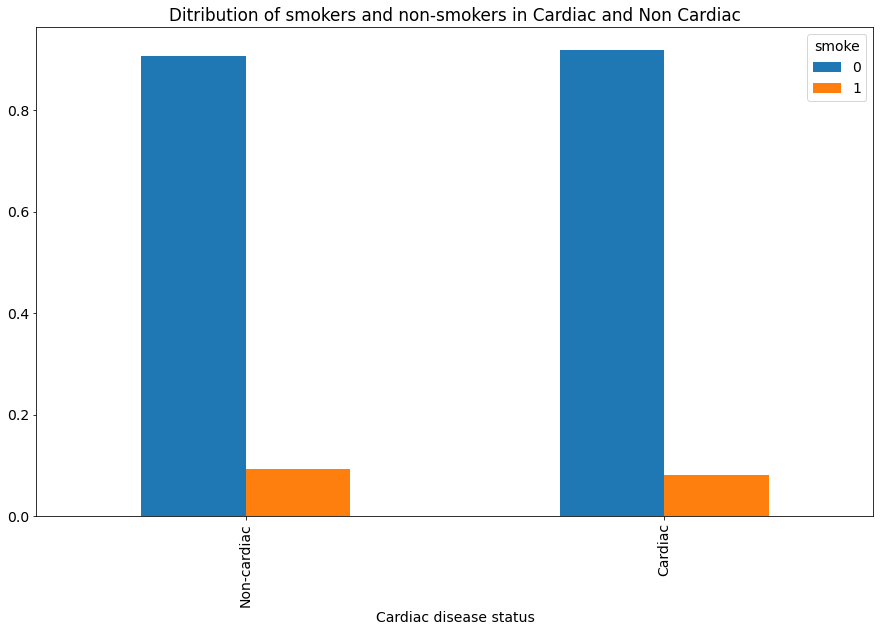

In [46]:
df_smoke.stack().unstack(level = 1).plot.bar()
plt.title('Ditribution of smokers and non-smokers in Cardiac and Non Cardiac')
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.show()

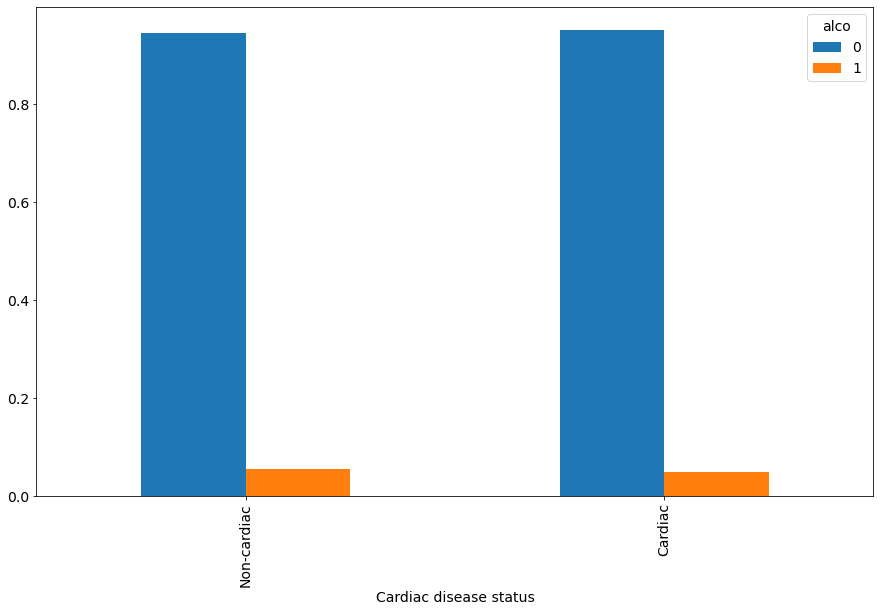

In [47]:
df_alco = pd.DataFrame(df_copy.groupby('cardio')['alco'].value_counts(normalize = True))
df_alco.stack().unstack(level = 1).plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.show()

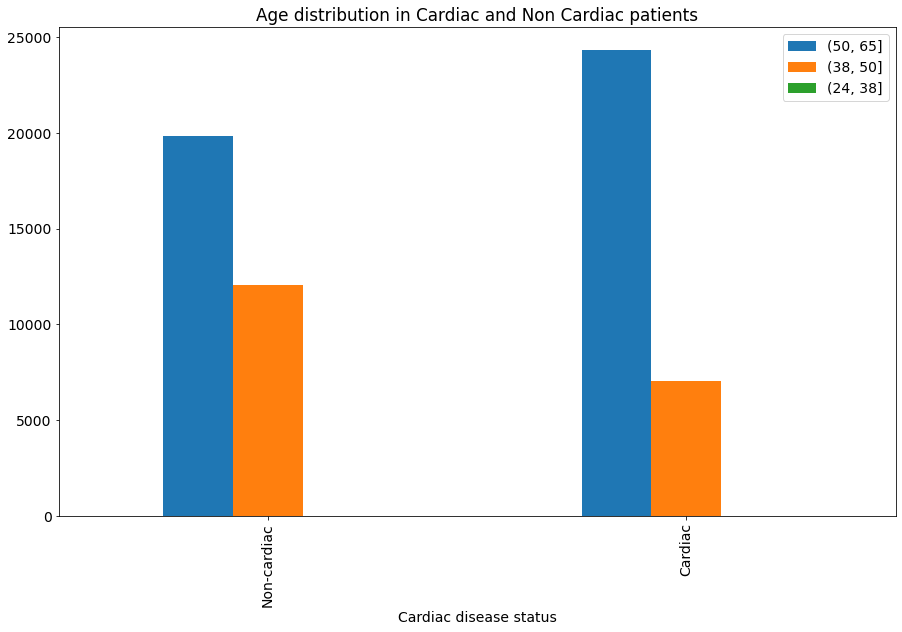

In [48]:
pd.DataFrame(df_copy.groupby('cardio')['Age_bins'].value_counts()).stack().unstack(level = 1).plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.legend(loc = 'upper right')
plt.title('Age distribution in Cardiac and Non Cardiac patients')
plt.show()

In [49]:
df_copy['cholesterol'] = df_copy['cholesterol'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well-Above Normal'})
df_copy['gluc'] = df_copy['gluc'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well-Above Normal'})

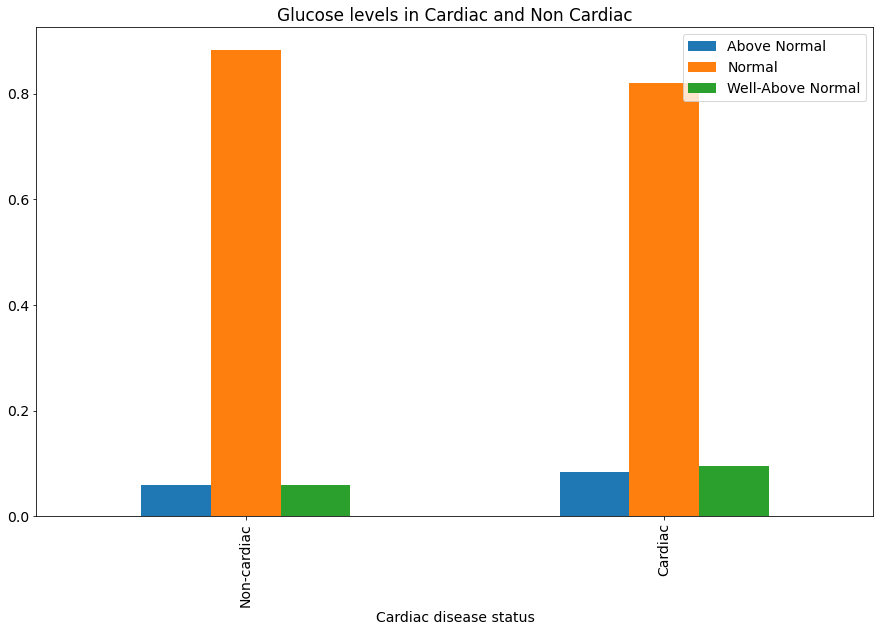

In [50]:
pd.DataFrame(df_copy.groupby('cardio')['gluc'].value_counts(normalize = True)).stack().unstack(level = 1).plot.bar()
plt.xticks([0,1], ['Non-cardiac', 'Cardiac'])
plt.xlabel('Cardiac disease status')
plt.legend(loc = 'upper right')
plt.title('Glucose levels in Cardiac and Non Cardiac')
plt.show()

In [51]:
df_copy['Age_bins'].value_counts()

(50, 65]    44109
(38, 50]    19136
(24, 38]        3
Name: Age_bins, dtype: int64

In [52]:
df_copy.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
Age_bins       0
BMI            0
BMI_binned     0
BP_category    0
dtype: int64

In [53]:
df_copy['BMI_binned'].unique()

['Healthy', 'Obese', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Healthy' < 'Overweight' < 'Obese']

In [54]:
df_copy['cholesterol'].unique()

array(['Normal', 'Well-Above Normal', 'Above Normal'], dtype=object)

In [55]:
df_copy['gluc'].unique()

array(['Normal', 'Above Normal', 'Well-Above Normal'], dtype=object)

In [56]:
age_cat = df_copy['Age_bins'].unique()
len(age_cat)

3

In [57]:
df_copy['BP_category'].unique()

array(['High Blood Pressure - Stage 1', 'High Blood Pressure - Stage 2',
       'Normal', 'Elevated'], dtype=object)

In [58]:
df_copy['BMI_binned'].replace({'Underweight': 0, 'Healthy': 1, 'Overweight': 2, 'Obese': 3}, inplace = True)
df_copy['Age_bins'].replace({age_cat[0]: 0, age_cat[1]: 1, age_cat[2]: 2}, inplace = True)
df_copy['cholesterol'].replace({'Normal': 0, 'Above Normal': 1, 'Well-Above Normal': 2}, inplace = True)
df_copy['gluc'].replace({'Normal': 0, 'Above Normal': 1, 'Well-Above Normal': 2}, inplace = True)
df_copy['BP_category'].replace({'Normal': 0, 'Elevated': 1, 'High Blood Pressure - Stage 1': 2, 'High Blood Pressure - Stage 2': 3}, inplace = True)

In [60]:
from scipy.stats import chi2_contingency
cross_tab_smoke = pd.crosstab(df_copy['cardio'],df_copy['smoke'])
stat, p, dof, expected = chi2_contingency(cross_tab_smoke)
p

5.279629344946606e-07

In [61]:
cross_tab_active = pd.crosstab(df_copy['cardio'],df_copy['active'])
stat, p, dof, expected = chi2_contingency(cross_tab_active)
p

1.0929036921682889e-21

In [62]:
cross_tab_alco = pd.crosstab(df_copy['cardio'],df_copy['alco'])
stat, p, dof, expected = chi2_contingency(cross_tab_alco)
p

0.00374275951260479

## Splitting and scaling  the data

In [63]:
X = df_copy.drop(['cardio', 'active', 'alco', 'smoke', 'weight', 'ap_lo'], axis =1).to_numpy()


In [64]:
y = df_copy['cardio'].to_numpy()

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_t, x_val, y_t, y_val = train_test_split(X, y, test_size=0.25, random_state=123)

In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
X_val = scale.fit_transform(x_val)


## Logisitc Regression

In [67]:
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

log_reg = linear_model.LogisticRegression()


parameter_grid = {'C':np.logspace(0,1,100), 
                  'penalty':['l1', 'l2',],
                  'solver': [ 'saga', 'newton-cg', 'lbfgs', 'newton-cholesky', 'sag']
                  }

random_lr = RandomizedSearchCV(estimator=log_reg, param_distributions=parameter_grid,
n_iter=7, scoring='accuracy', cv=10, n_jobs=-1)

random_lr.fit(X_train, y_train)


C:\Users\kavit\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.72028532        nan        nan        nan 0.72030509        nan
        nan]
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=7, n_jobs=-1,
                   param_distributions={'C': array([ 1.        ,  1.02353102,  1.04761575,  1.07226722,  1.09749877,
        1.12332403,  1.149757  ,  1.17681195,  1.20450354,  1.23284674,
        1.26185688,  1.29154967,  1.32194115,  1.35304777,  1.38488637,
        1.41747416,  1.45082878,  1.48496826,  1.51991108,  1.55567614,
        1.59228279,  1.62975083,  1.66810054,...
        5.72236766,  5.85702082,  5.9948425 ,  6.13590727,  6.28029144,
        6.42807312,  6.57933225,  6.73415066,  6.8926121 ,  7.05480231,
        7.22080902,  7.39072203,  7.56463328,  7.74263683,  7.92482898,
        8.11130831,  8.30217568,  8.49753436,  8.69749003,  8.90215085,
        9.11162756,  9.32603347,  9.54548457,  9.77009957, 10.        ]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'newton-cg', 'lbfgs',
                               

In [68]:
random_lr.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 2.3644894126454075}

In [69]:
random_lr.best_score_

0.7203050877120336

In [70]:
random_lr.score(X_val,y_val)

0.723501138375917

In [71]:
def plot_roc_curve(model, Y_test, X_test):
    from sklearn.metrics import roc_curve, auc
    import plotly.express as px
    y_true = Y_test
    y_probas = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true, y_probas)
    fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
    )
    fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    return fig.show()

In [72]:
plot_roc_curve(random_lr, y_train, X_train)

In [73]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train,random_lr.predict_proba(X_train)[:,1],drop_intermediate=False)

In [74]:
df_results = pd.DataFrame()
df_results['fpr'] = fpr
df_results['tpr'] = tpr
df_results['thresholds'] = thresholds
df_results['absolute'] = np.abs(fpr+tpr-1)
df_results.set_index('thresholds', inplace = True)

In [75]:
t = df_results[df_results['absolute'] == df_results['absolute'].min()].index
t

Float64Index([0.4522376786367896], dtype='float64', name='thresholds')

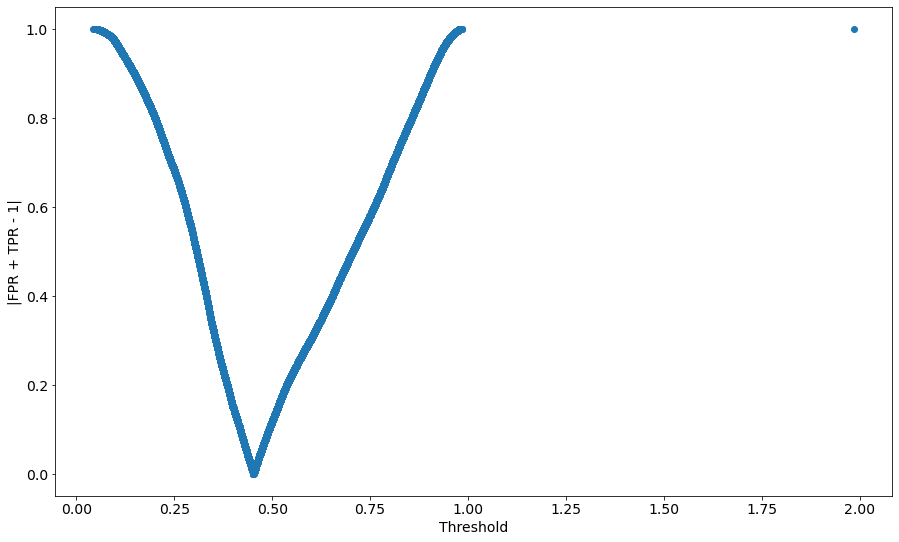

In [76]:
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [77]:
proba_val_lr = random_lr.predict_proba(X_val)[:,1]
proba_val_lr

array([0.31153225, 0.68264141, 0.92575509, ..., 0.88519145, 0.33273336,
       0.76669087])

In [78]:
t

Float64Index([0.4522376786367896], dtype='float64', name='thresholds')

In [79]:
 pred_val_lr = np.where(proba_val_lr > t[0], 1, 0)

In [80]:
pred_test_lr = random_lr.predict_proba(X_test)[:,1]
pred_test_lr = np.where(pred_test_lr > t[0], 1, 0)


In [81]:
print("Validation Accuracy:",np.mean(pred_val_lr == y_val))

Validation Accuracy: 0.7217935745003795


In [82]:
print("Test Accuracy:",np.mean(pred_test_lr == y_test))

Test Accuracy: 0.7256126482213439


## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint

tree = DecisionTreeClassifier()
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A63B15FD0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020A63A39EE0>})

In [84]:
tree_cv.predict_proba(X_train)

array([[0.44339784, 0.55660216],
       [0.81429183, 0.18570817],
       [0.13824968, 0.86175032],
       ...,
       [0.63798801, 0.36201199],
       [0.44339784, 0.55660216],
       [0.63798801, 0.36201199]])

In [85]:
def find_threshold(model, X_train, y_train):
    fpr, tpr, thresholds = roc_curve(y_train,model.predict_proba(X_train)[:,1],drop_intermediate=False)
    df_results = pd.DataFrame()
    df_results['fpr'] = fpr
    df_results['tpr'] = tpr
    df_results['thresholds'] = thresholds
    df_results['absolute'] = np.abs(fpr+tpr-1)
    df_results.set_index('thresholds', inplace = True)
    threshold = df_results[df_results['absolute'] == df_results['absolute'].min()].index
    return threshold[0]

In [86]:
t_dt = find_threshold(tree_cv, X_train, y_train)

In [87]:
proba_val_dt = tree_cv.predict_proba(X_val)[:,1]
pred_val_dt = np.where(proba_val_dt > t_dt, 1, 0)
print("Validation Accuracy:",np.mean(pred_val_dt == y_val))


Validation Accuracy: 0.718821148494814


In [88]:
proba_test_dt = tree_cv.predict_proba(X_test)[:,1]
pred_test_dt = np.where(proba_test_dt > t_dt, 1, 0)
print("Test Accuracy:",np.mean(pred_test_dt == y_test))

Test Accuracy: 0.72


## XGBoost

In [89]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


xgb_classifier = xgb.XGBClassifier()
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth': [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree': [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=RandomizedSearchCV(xgb_classifier,
                            param_distributions=params,
                            n_iter=5,scoring='accuracy',
                            n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [90]:
rs_model.score(X_val, y_val)

0.7461421705034151

In [91]:
y_train.shape

(50598,)

In [92]:
X_train.shape

(50598, 11)

In [93]:
X_train

array([[-0.37135424,  0.74098217,  1.36036449, ..., -0.40012603,
         0.15834152,  1.02197083],
       [ 0.86225361, -2.00333921, -0.73509711, ..., -0.40012603,
         0.15834152, -0.07818831],
       [-0.11553487, -2.07317305,  1.36036449, ..., -0.09800595,
         0.15834152,  1.02197083],
       ...,
       [-1.68339859, -0.49076792, -0.73509711, ..., -0.85919161,
        -1.08630107, -0.07818831],
       [-0.86657122, -0.58288916, -0.73509711, ...,  2.1286583 ,
         1.40298411,  1.02197083],
       [ 1.36041541, -0.00787434, -0.73509711, ...,  1.07123801,
         1.40298411, -2.27850659]])

In [94]:
t_xg = find_threshold(rs_model, X_train, y_train)


In [95]:
pred_val_xg = rs_model.predict_proba(X_val)[:,1]
pred_val_xg = [1 if x > t else 0 for x in pred_val_xg ]

In [96]:
pred_test_xg = rs_model.predict_proba(X_test)[:,1]
pred_test_xg = [1 if x > t else 0 for x in pred_test_xg ]

In [97]:
print("Validation accuracy:",np.mean(pred_val_xg == y_val))

Validation accuracy: 0.7452567670123956


In [98]:
print("Test accuracy:",np.mean(pred_test_xg == y_test))

Test accuracy: 0.7302766798418973


In [99]:
plot_roc_curve(rs_model, y_train, X_train)

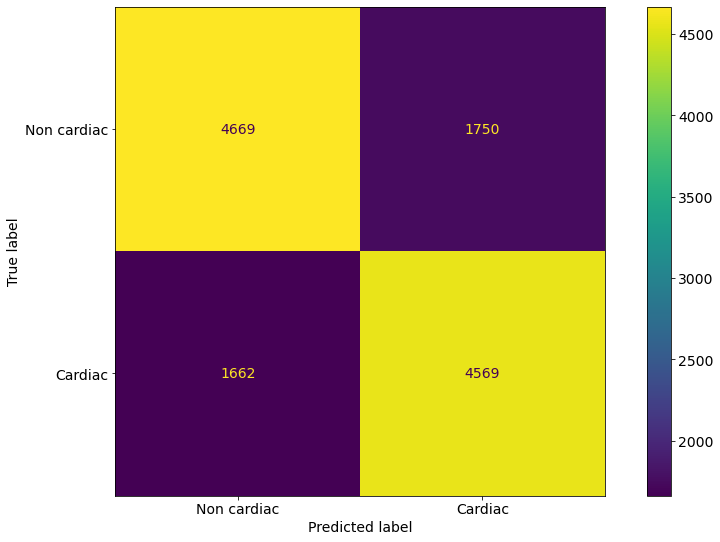

In [100]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred_test_xg)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Non cardiac', 'Cardiac'])

cm_display.plot()
plt.show()

## Neural Network

In [101]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures

In [102]:
model = Sequential()
model.add(Dense(250, input_dim = (X_train.shape[1]), activation = 'relu'))
model.add(Dense(150, input_dim = (X_train.shape[1]), activation = 'relu'))
model.add(Dense(25, input_dim = (X_train.shape[1]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 1000)



Epoch 1/100
51/51 [==============================] - 1s 3ms/step - loss: 0.5758 - accuracy: 0.7059
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7232
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.7249
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7247
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.7260
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5505 - accuracy: 0.7270
Epoch 7/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.7271
Epoch 8/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.7281
Epoch 9/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.7275
Epoch 10/100
51/51 [==============================] - 0s 3ms/step - loss: 0.5480 - accuracy: 0.7289
Epoch 11/

In [103]:
pred = model.predict(X_test)


396/396 [==============================] - 0s 857us/step


In [104]:
def find_threshold(model, X_train, y_train):
    fpr, tpr, thresholds = roc_curve(y_train,model.predict(X_train),drop_intermediate=False)
    df_results = pd.DataFrame()
    df_results['fpr'] = fpr
    df_results['tpr'] = tpr
    df_results['thresholds'] = thresholds
    df_results['absolute'] = np.abs(fpr+tpr-1)
    df_results.set_index('thresholds', inplace = True)
    t = df_results[df_results['absolute'] == df_results['absolute'].min()].index
    return t[0]
    
    

In [105]:
t_nn= find_threshold(model, X_train, y_train)

1582/1582 [==============================] - 1s 921us/step


In [106]:
pred_val_nn = model.predict(X_val)
predictions_val_cnn = np.where(pred_val_nn > t_nn, 1, 0)


495/495 [==============================] - 0s 888us/step


In [107]:
pred_val_cnn = predictions_val_cnn.flatten()

In [108]:
pred_val_cnn

array([0, 1, 1, ..., 1, 0, 1])

In [109]:
y_val

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [110]:
pred_train_nn = model.predict(X_train)
predictions_train_cnn = np.where(pred_train_nn > t_nn, 1, 0)
pred_train_cnn = predictions_train_cnn.flatten()

1582/1582 [==============================] - 1s 853us/step


In [111]:
 print("Train accuracy:", np.mean(pred_train_cnn == y_train))

Train accuracy: 0.7779161231669236


In [112]:
 print("Validation accuracy:", np.mean(pred_val_cnn == y_val))

Validation accuracy: 0.7640399696433089


In [113]:
pred_test_nn = model.predict(X_test)
predictions_test_cnn = np.where(pred_test_nn > t_nn, 1, 0)
pred_test_cnn = predictions_test_cnn.flatten()

396/396 [==============================] - 0s 876us/step


In [114]:
 print("Test Accuracy:", np.mean(pred_test_cnn == y_test))

Test Accuracy: 0.7015810276679841


## Random Forest Classsifier

In [115]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [116]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [117]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [118]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [119]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [120]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 25}

In [121]:
rf_grid.score(X_val, y_val)

0.7199595244118391

In [122]:
rf_grid.score(X_test, y_test)

0.7249802371541502

In [123]:
predictions_rf = rf_grid.predict(X_test)

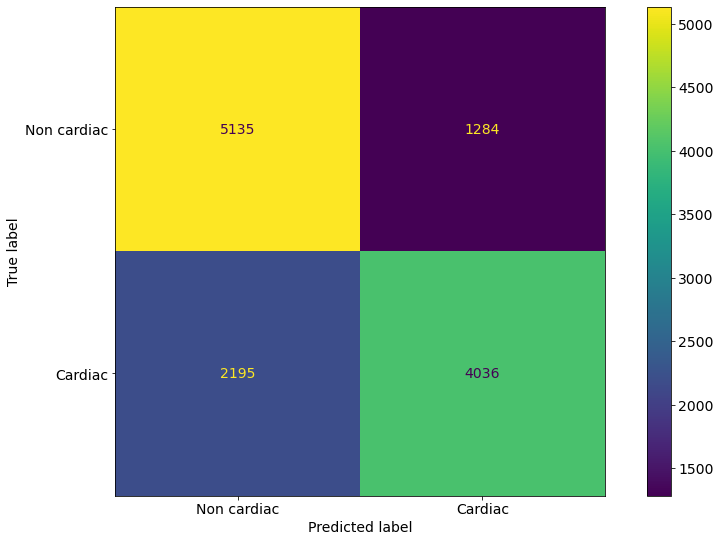

In [124]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predictions_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Non cardiac', 'Cardiac'])

cm_display.plot()
plt.show()

## K Nearest Neighbour

In [125]:
def find_optimal_k(X_train, y_train, X_val, y_val):
    from sklearn.neighbors import KNeighborsClassifier
    accuracy_rate = []
    for k in range(1,35):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        pred = neigh.predict(X_val)
        accuracy_rate.append(np.mean(pred == y_val))
    accuracy_arr = np.array(accuracy_rate)
    max_acc = np.argmax(accuracy_arr)
    return max_acc + 1
k = find_optimal_k(X_train, y_train, X_val, y_val)


In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [127]:
k

1

In [128]:
knn.score(X_test, y_test)

0.6371541501976284